## 节点连接数 Node Degree 度分析

[参考文档](https://networkx.org/documentation/stable/auto_examples/drawing/plot_degree.html)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

创建图

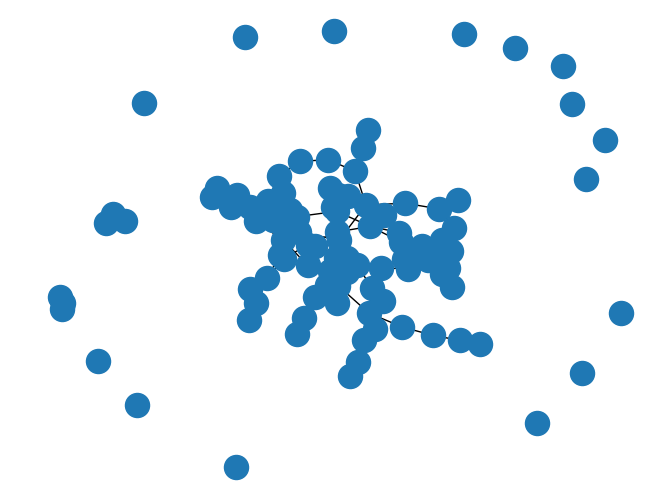

In [2]:
# 创建binomial graph
# n-节点数
# p-任意两个节点产生连接的概率
G = nx.gnp_random_graph(100, 0.02, seed=10374196)

# 初步可视化
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

最大连通域子图

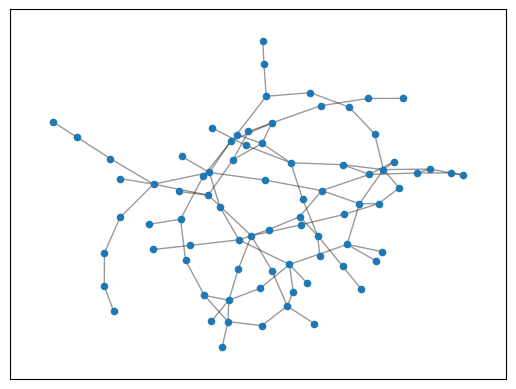

In [3]:
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])

pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw(Gcc, pos)

nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)

In [4]:
nx.draw_networkx?

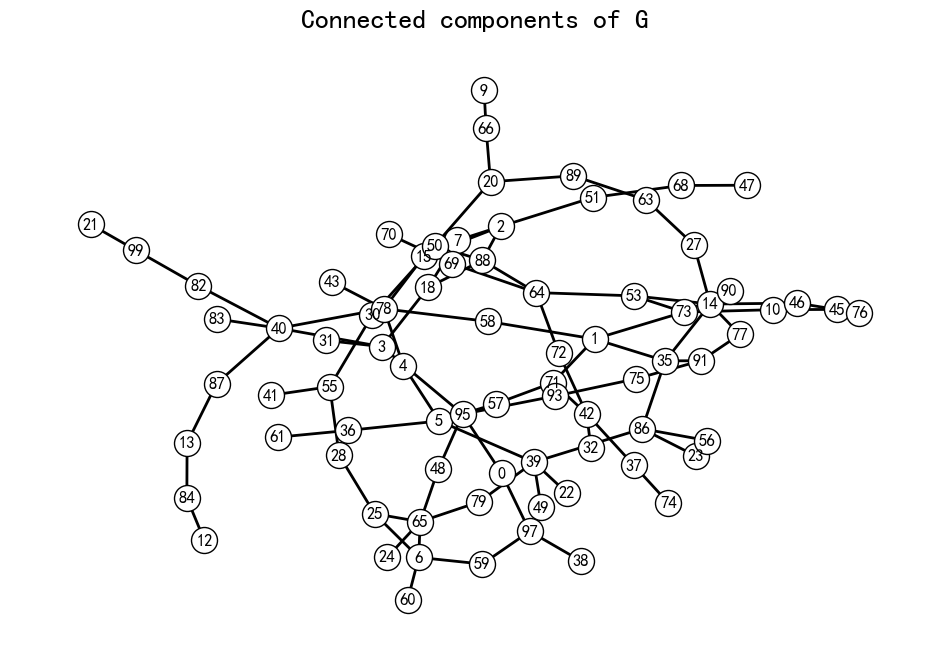

In [5]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(Gcc, seed=10396953)

# 设置其他可视化样式
options = {
    'font_size': 12,
    'node_size': 350,
    'node_color': 'white',
    'edgecolors': 'black',
    'linewidths': 1,    # 节点线宽
    'width': 2,    # edge线宽
}

nx.draw_networkx(Gcc, pos, **options)

plt.title('Connected components of G', fontsize=20)
plt.axis('off')
plt.show()

每个节点的连接数(degree)

In [6]:
G.degree()

DegreeView({0: 2, 1: 4, 2: 4, 3: 4, 4: 2, 5: 4, 6: 4, 7: 2, 8: 2, 9: 1, 10: 3, 11: 0, 12: 1, 13: 2, 14: 6, 15: 2, 16: 0, 17: 0, 18: 3, 19: 1, 20: 3, 21: 1, 22: 1, 23: 1, 24: 1, 25: 3, 26: 0, 27: 2, 28: 2, 29: 0, 30: 2, 31: 1, 32: 1, 33: 0, 34: 1, 35: 4, 36: 2, 37: 2, 38: 1, 39: 5, 40: 5, 41: 1, 42: 4, 43: 1, 44: 0, 45: 2, 46: 3, 47: 1, 48: 2, 49: 2, 50: 3, 51: 2, 52: 0, 53: 3, 54: 0, 55: 3, 56: 1, 57: 2, 58: 2, 59: 2, 60: 1, 61: 1, 62: 0, 63: 2, 64: 4, 65: 5, 66: 2, 67: 0, 68: 2, 69: 2, 70: 1, 71: 3, 72: 2, 73: 4, 74: 1, 75: 2, 76: 2, 77: 2, 78: 5, 79: 2, 80: 0, 81: 1, 82: 2, 83: 1, 84: 2, 85: 0, 86: 4, 87: 2, 88: 4, 89: 2, 90: 2, 91: 3, 92: 0, 93: 2, 94: 0, 95: 4, 96: 1, 97: 4, 98: 0, 99: 2})

In [7]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

degree_sequence

[6,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

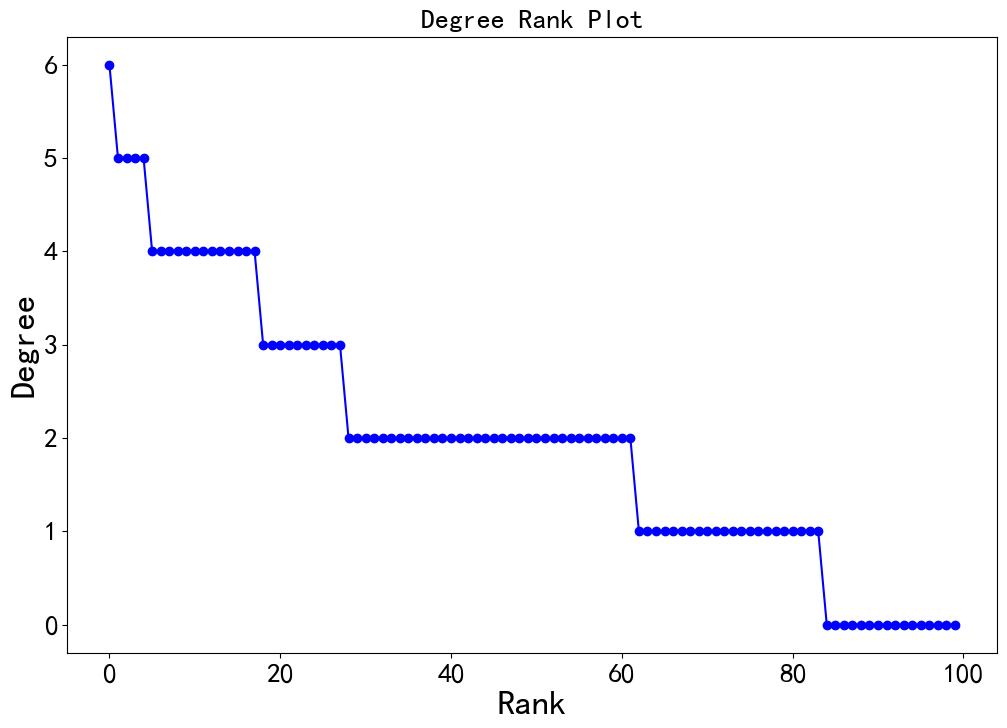

In [8]:
plt.figure(figsize=(12, 8))
plt.plot(degree_sequence, 'b-', marker='o')
plt.title('Degree Rank Plot', fontsize=20)
plt.ylabel('Degree', fontsize=25)
plt.xlabel('Rank', fontsize=25)
plt.tick_params(labelsize=20)  # 设置坐标文字大小
plt.show()

节点Degree直方图

In [9]:
X = np.unique(degree_sequence, return_counts=True)[0]
Y = np.unique(degree_sequence, return_counts=True)[1]

In [10]:
X

array([0, 1, 2, 3, 4, 5, 6])

In [11]:
Y

array([16, 22, 34, 10, 13,  4,  1], dtype=int64)

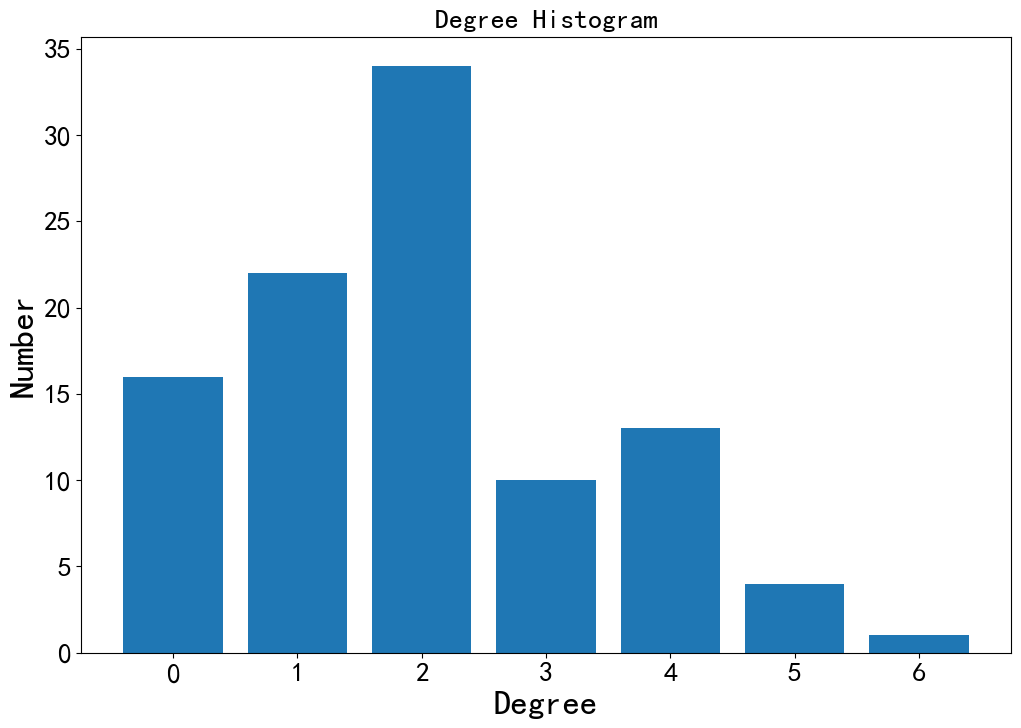

In [12]:
plt.figure(figsize=(12, 8))
plt.bar(X, Y)

plt.title('Degree Histogram', fontsize=20)
plt.ylabel('Number', fontsize=25)
plt.xlabel('Degree', fontsize=25)
plt.tick_params(labelsize=20)
plt.show()
